# Moment Forecasting Example

## Loading Moment Model

In [ ]:
import os
import sys
import numpy as np

src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

from samay.model import MomentModel
from samay.dataset import MomentDataset
from samay.utils import load_args

repo = "AutonLab/MOMENT-1-large"
config = {
    "task_name": "forecasting",
    "forecast_horizon": 192,
    "head_dropout": 0.1,
    "weight_decay": 0,
    "freeze_encoder": True,  # Freeze the patch embedding layer
    "freeze_embedder": True,  # Freeze the transformer encoder
    "freeze_head": False,  # The linear forecasting head must be trained
}
mmt = MomentModel(config=config, repo=repo)

Loading MOMENT model from AutonLab/MOMENT-1-large


## Finetune Moment Model on the ETT dataset

In [ ]:
train_dataset = MomentDataset(name="ett", datetime_col='date', path='../src/tsfmproject/models/moment/data/ETTh1.csv', 
                              mode='train', horizon_len=192)
# dtl = train_dataset.get_data_loader()

val_dataset = MomentDataset(name="ett", datetime_col='date', path='../src/tsfmproject/models/moment/data/ETTh1.csv',
                            mode='test', horizon_len=192)
# path = '../src/tsfmproject/models/moment/data/ETTh1.csv'

# dataset = MomentDataset(name="ett", datetime_col='date', path=path, 
#                               mode='train', horizon=192)

finetuned_model = mmt.finetune(train_dataset, task_name="forecasting")
mmt.evaluate(val_dataset, task_name="forecasting")


/nethome/sli999/anaconda3/envs/torch/lib/python3.11/site-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


Epoch 0: Train loss: 0.572
Epoch 1: Train loss: 0.502
Epoch 2: Train loss: 0.473
Epoch 3: Train loss: 0.457
Epoch 4: Train loss: 0.452


{'mse': 0.5570129,
 'mae': 0.5200917,
 'mase': 0.82687783,
 'mape': -0.30029196,
 'rmse': 0.746333,
 'nrmse': 0.07844285181705611,
 'smape': 0.8625615,
 'msis': 0.081994146,
 'nd': 28.05683713775537}

## Test the Finetuned Model

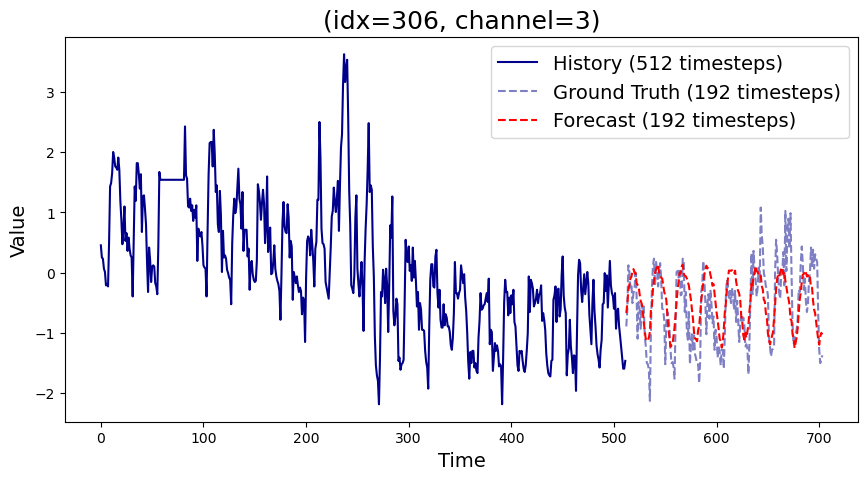

In [ ]:
# avg_loss, trues, preds, histories = mmt.evaluate(val_dataset, task_name='forecasting')
# print("Validation loss:", avg_loss)
mmt.plot(val_dataset, task_name='forecasting')

## Visualization of the evaluation

In [ ]:
# import matplotlib.pyplot as plt

# # Pick a random channel and time index
# trues = np.array(trues)
# preds = np.array(preds)
# histories = np.array(histories)
# channel_idx = np.random.randint(0, 7) 
# time_index = np.random.randint(0, trues.shape[0]) 

# history = histories[time_index, channel_idx, :] 
# true = trues[time_index, channel_idx, :]
# pred = preds[time_index, channel_idx, :]

# plt.figure(figsize=(12, 4))

# # Plotting the first time series from history
# plt.plot(range(len(history)), history, label='History (512 timesteps)', c='darkblue')

# # Plotting ground truth and prediction
# num_forecasts = len(true)

# offset = len(history)
# plt.plot(range(offset, offset + len(true)), true, label='Ground Truth (192 timesteps)', color='darkblue', linestyle='--', alpha=0.5)
# plt.plot(range(offset, offset + len(pred)), pred, label='Forecast (192 timesteps)', color='red', linestyle='--')

# plt.title(f"ETTh1 (Hourly) -- (idx={time_index}, channel={channel_idx})", fontsize=18)
# plt.xlabel('Time', fontsize=14)
# plt.ylabel('Value', fontsize=14)
# plt.legend(fontsize=14)
# plt.show()